## 学习和使用Logstic回归

* 复习教材第5章内容，调试运行相关代码。
* 基于教材随机梯度上升算法实现小批量随机梯度上升算法，以疝气病马数据集进行训练和测试，并与教材中的算法进行比较。（第八周交电子版实验报告）
* 查阅scikit-learn工具包中Logistic回归学习器的相关说明，了解相关函数使用方法。

## 实验原理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Logistic回归：基于最优化方法的最佳回归系数确定

使用Logistic回归进行分类的基本思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。

在两个类的情况下，想要的函数应该输出0或1，这类函数称为单位阶跃函数。该函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理，而Sigmoid函数有类似的性质，从数学上更容易处理：

$$
y = \dfrac{1}{1+e^{-z}}
$$

## 梯度上升BGA

sigmoid函数的输入 $z$ 可由下面公式得出

$$
z = w_0x_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
\\ 或 \\
z = \boldsymbol{w}^T\boldsymbol{x}
$$

梯度上升法的基本思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。函数 $f(x,y)$ 的梯度由下式表示：

$$
\nabla f(x,y) = \left(
\begin{align}
\dfrac{\partial f(x,y)}{\partial x} \\
\dfrac{\partial f(x,y)}{\partial y} 
\end{align}
\right)
$$

梯度算子总是指向函数值增长最快的方向，而移动量的大小由步长 $\alpha$ 决定。梯度上升算法的迭代公式如下：

$$
w := w+\alpha \nabla_w f(w)
$$

该公式将一直被迭代执行，直至达到某个停止条件（例如迭代次数达到某个指定值或算法达到某个可以允许的误差范围）。

> 对应地，梯度下降算法公式为 $w := w-\alpha \nabla_w f(w)$

梯度上升法的伪代码如下：

>* 每个回归系数初始化为1
>* 重复R次
> >  * 计算整个数据集的梯度
> >  * 使用alpha × gradient更新回归系数的向量
> >  * 返回回归系数

In [2]:
## 5-1 Logistic回归梯度上升优化算法

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('./data/testSet6.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001 # 步长
    maxCycles = 500 # 迭代次数
    weights = np.ones((n,1))
    for k in range(maxCycles):              
        h = sigmoid(dataMatrix*weights)     
        error = (labelMat - h)              # 计算真实类别与预测的差值
        weights = weights + alpha * dataMatrix.transpose()* error #按照差值方向调整回归系数
    return weights

In [3]:
dataArr, labelMat = loadDataSet()

该方法加载了一个100行的数据集，每行数据三列分别为X1、X2和标签。对数据部分增加一列X0设置初始值为1.

In [4]:
display(dataArr[:3])

[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862]]

In [5]:
display(labelMat[:3])

[0, 1, 0]

使用梯度上升方法计算权值。在`gradAscnt()`方法中已经设定好目标移动步长 $\alpha$ 值和迭代次数 `maxCycles`。程序在数据集上自动迭代计算$w := w+ \alpha \nabla_w f(w)$

按照差值方向、设定的步长调整回归系数。500次迭代后计算出权值：

In [6]:
weights = gradAscent(dataArr, labelMat)
display(weights)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 可视化决策边界

仅有权值，看着还是比较抽象的，可以使用 `matplotlib` 包在坐标系中绘制决策边界。

设置Sigmoid函数为0（分类为0和1的边界点），设定 $0 = w_0x_0 + w_1x_1 + w_2x_2$ ，解出 $x_1$ , $x_2$ 的关系式( $x_0=1$ )：

$$
x_2 = \dfrac{-w_0 - w_1x_1}{w_2}
$$

In [7]:
## 5-2 画出数据集和Logistic回归最佳拟合直线的函数

def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s') #正例点
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2] # 设置了Sigmoid函数为0
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

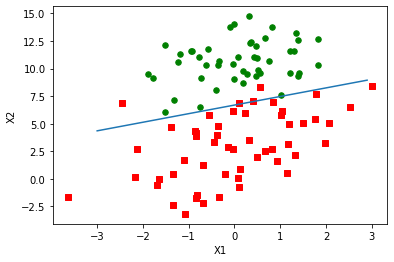

In [8]:
plotBestFit(weights.getA()) # weights是numpy矩阵，将其转为数组array

## 伪随机梯度上升SGA

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，在小规模数据集上可用，但如果样本数和特征数很高，该方法的计算复杂度就太高了。

一种改进的方法是一次**仅用一个样本点来更新回归系数**，该方法称为 **随机梯度上升** 算法。

In [9]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights)) # 区别：仅使用第i条数据用于更新系数
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i] # 区别：仅使用第i条数据用于更新系数
    return weights

array([ 1.01702007,  0.85914348, -0.36579921])

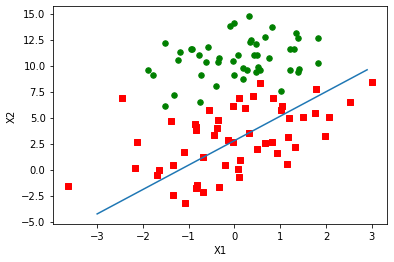

In [10]:
weights = stocGradAscent0(np.array(dataArr),labelMat)
display(weights)
plotBestFit(weights)

从可视化可以看出，区分的效果一般，误分现象比较严重。

这是因为执行一次`stocGradAscent0()`方法，实际上只是利用样本集的每条数据更新回归系数一次，而之前的`stocGradAscent()`迭代了500次，所以后者呈现的效果不佳，可以对这一过程进行迭代查看效果。

In [11]:
## 多次迭代再比较，看看真本事

def stocGradAscent0cycle(dataMatrix, classLabels,maxCycles = 200):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    weights_arr = np.zeros(shape=(maxCycles*m,n))
    for k in range(maxCycles):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weights_arr[i+k*m,:] = weights
    return weights,weights_arr

array([ 9.55333325,  0.87771989, -1.36118565])

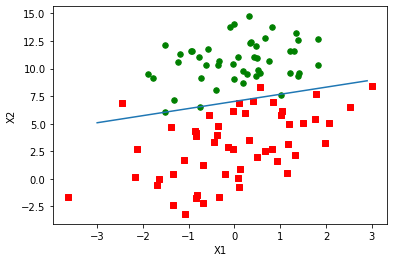

In [12]:
maxCycle = 500

weights_cycle, weights_cycle_arr = stocGradAscent0cycle(np.array(dataArr),labelMat,maxCycle)
display(weights_cycle)
plotBestFit(weights_cycle)

提升迭代次数到500次，最终分类效果尚可。我们可以绘图查看各个系数的波动情况：

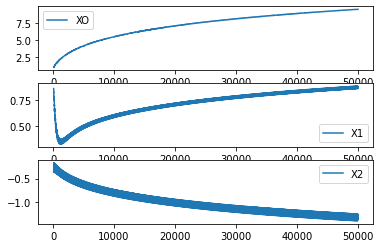

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(range(101,maxCycle*len(dataArr)+1),weights_cycle_arr[100:,0],label='XO')
ax2 = fig.add_subplot(312)
ax2.plot(range(101,maxCycle*len(dataArr)+1),weights_cycle_arr[100:,1],label='X1')
ax3 = fig.add_subplot(313)
ax3.plot(range(101,maxCycle*len(dataArr)+1),weights_cycle_arr[100:,2],label='X2')
ax1.legend();ax2.legend();ax3.legend()

## 随机梯度上升SGA

实际上因为数据集本身并不是线性可分的，存在一些不能正确分类的样本点，在每次迭代时可能引发系数的一定程度的变化（图中的震荡）。另外也可以看出三个系数收敛的速度也不够快。针对这些问题，可以修改原伪随机梯度上升算法的实现来解决。

改进之处在于

1. 每次执行的步长 $\alpha$ 会进行随机调整。这样可以一定程度上消除某些样本点的影响。

2. 原伪随机算法中实际每轮迭代时是使用了每一个样本点来做优化，而随机梯度上升应该是**随机选取**一个样本点来更新回归系数。这里便随机选择。

In [14]:
import random
def stocGradAscent10(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    weights_arr = np.zeros(shape=(numIter*m,n))
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #alpha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            weights_arr[i+j*m,:] = weights
            del(dataIndex[randIndex])
    return weights, weights_arr

array([14.07493302,  1.01817025, -1.96306059])

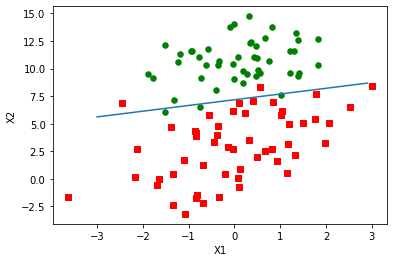

In [15]:
numIter = 500
weights, weights_arr = stocGradAscent10(np.array(dataArr),labelMat,numIter)
display(weights)
plotBestFit(weights)

同样的500轮迭代，最终效果还是不错的。

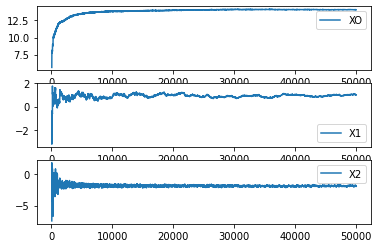

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(range(101,maxCycle*len(dataArr)+1),weights_arr[100:,0],label='XO')
ax2 = fig.add_subplot(312)
ax2.plot(range(101,maxCycle*len(dataArr)+1),weights_arr[100:,1],label='X1')
ax3 = fig.add_subplot(313)
ax3.plot(range(101,maxCycle*len(dataArr)+1),weights_arr[100:,2],label='X2')
ax1.legend();ax2.legend();ax3.legend()

虽然囿于样本和步长选择的随机性，回归参数仍然存在一定的波动，但是可以明显看到参数的波动幅度和收敛速度相对于之前的伪随机算法有所提升。

前期波动比较明显的原因是随机选取 $\alpha$ 的方法在迭代之初使之会有较大的值。（4/1 + 0.0001）

《实战》认为这样一种在线学习的方式（`gradAscent1()`）比批处理的方式（`gradAscent()`）“所使用的计算量更少”，但是仅就提供的代码而言，如果迭代轮数相同，我认为二者的运算量相同，而且批处理方式由于用到了矩阵运算（`numpy`有优化，且在多核硬件如GPU上有加速效果）实际上执行速度要快于前者。

查阅相关资料得知，得出SGA收敛速度快于BGA这一结论的原因是，就权重参数的更新频率而言，遍历一轮所有样本，BGA仅更新了一次 $w$ ，而SGA由于是用每一条数据更新，实际上更新了训练集样本数量等量次数的 $w$ ，在这一过程中（尤其是训练集样本数非常大时），有可能 $w$ 早已收敛。

## 实战：疝气病症预测马死亡率

《实战》直接提供了预处理过的数据，方法是对缺失值填充0，这么做的原因是sigmoid(0)=0.5，对分类结果没有倾向性。

In [17]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #alpha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [18]:
def classifyVector(inX, weights):
    prob = sigmoid(np.sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest(): 
    train = pd.read_csv('./data/horseColicTraining.txt',sep='\t',header=None)
    trainingSet = train.iloc[:,:21];trainingLabels = train.iloc[:,21:].values.tolist()
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    test = pd.read_csv('./data/horseColicTest.txt',sep='\t',header=None)
    testSet = test.iloc[:,:21];testLabel = test.iloc[:,21:]
    errorCount = 0
    for index,row in testSet.iterrows():
        if int(classifyVector(np.array(row),trainWeights)) != int(testLabel.iloc[index,0]):
            errorCount += 1
    errorRate = (float(errorCount)/len(testSet))
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [19]:
multiTest()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


the error rate of this test is: 0.328358
the error rate of this test is: 0.447761
the error rate of this test is: 0.298507
the error rate of this test is: 0.477612
the error rate of this test is: 0.298507
the error rate of this test is: 0.268657
the error rate of this test is: 0.417910
the error rate of this test is: 0.268657
the error rate of this test is: 0.343284
the error rate of this test is: 0.328358
after 10 iterations the average error rate is: 0.347761


迭代10次，平均准确率约为0.34左右，因为原数据有近30%的缺失，所以这个成绩尚可。后续可尝试修改步长进行优化。